# 1. Regression

## 1.1. Load Data and Train Model

In [1]:
from sklearn.linear_model import LinearRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import mean_squared_error
import shap
import numpy as np
import pandas as pd

dataset = load_dataset('us_crime')
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['test']
test = dataset['test']

model = LinearRegression()
model.fit(train['X'], train['y'])

mean_squared_error(test['y'], model.predict(test['X']))

/home/cristian/.local/share/hatch/env/virtual/holisticai/g8_gwgw3/testing/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0.013731416251044858

# Create a Custom Feature Importance Calculator

In [2]:
!pip install shap


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip


In [3]:
from holisticai.datasets import Dataset

class SHAPImportanceCalculator:
    importance_type : str = "local"
    def __init__(self, x_train, model):
        masker = shap.maskers.Independent(x_train)
        self.explainer = shap.Explainer(model.predict, masker=masker)

    def __call__(self, ds: Dataset):
        shap_values = self.explainer(ds['X'])
        return pd.DataFrame(data=np.abs(shap_values.values), columns=ds['X'].columns)

In [4]:
from holisticai.explainability.metrics import regression_explainability_features
from holisticai.explainability.metrics import compute_explainability_metrics_from_features

feature_importance_fn = SHAPImportanceCalculator(train['X'], model)

xai_features = regression_explainability_features(test['X'], test['y'], model.predict, strategy=feature_importance_fn)

compute_explainability_metrics_from_features(xai_features, metric_type='both')

/home/cristian/.local/share/hatch/env/virtual/holisticai/g8_gwgw3/testing/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:394: UserWarning: <built-in function callable> is not a Python type (it may be an instance of an object), Pydantic will allow any object with no validation since we cannot even enforce that the input is an instance of the given type. To get rid of this error wrap the type with `pydantic.SkipValidation`.
  warn(


,value,reference
metric,,
Alpha Importance Score,0.376238,0.0
XAI Ease Score,1.000000,1.0
Position Parity,0.000000,1.0
Rank Alignment,0.121321,1.0
Spread Ratio,0.866735,0.0
Feature Stability,0.978839,0.0
Data Stability,2.212124,0.0


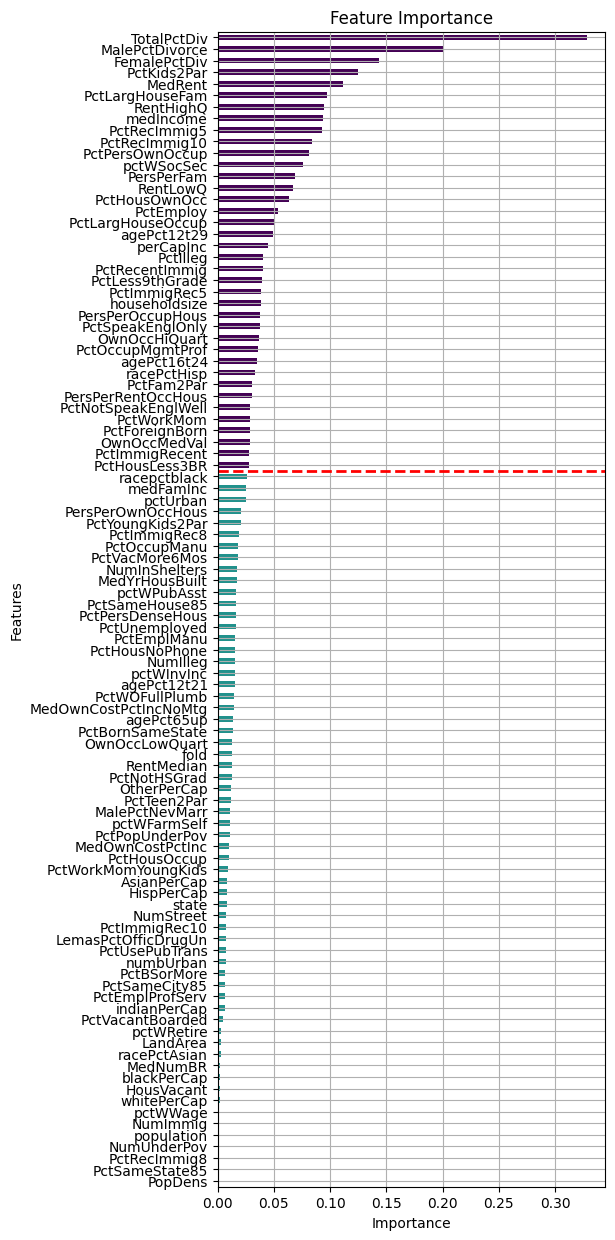

In [5]:
from holisticai.explainability.plots import plot_feature_importance
from matplotlib import pyplot as plt

fig,ax = plt.subplots(1,1, figsize=(5,15))
plot_feature_importance(xai_features.feature_importance, xai_features.ranked_feature_importance, top_n=100, ax=ax)

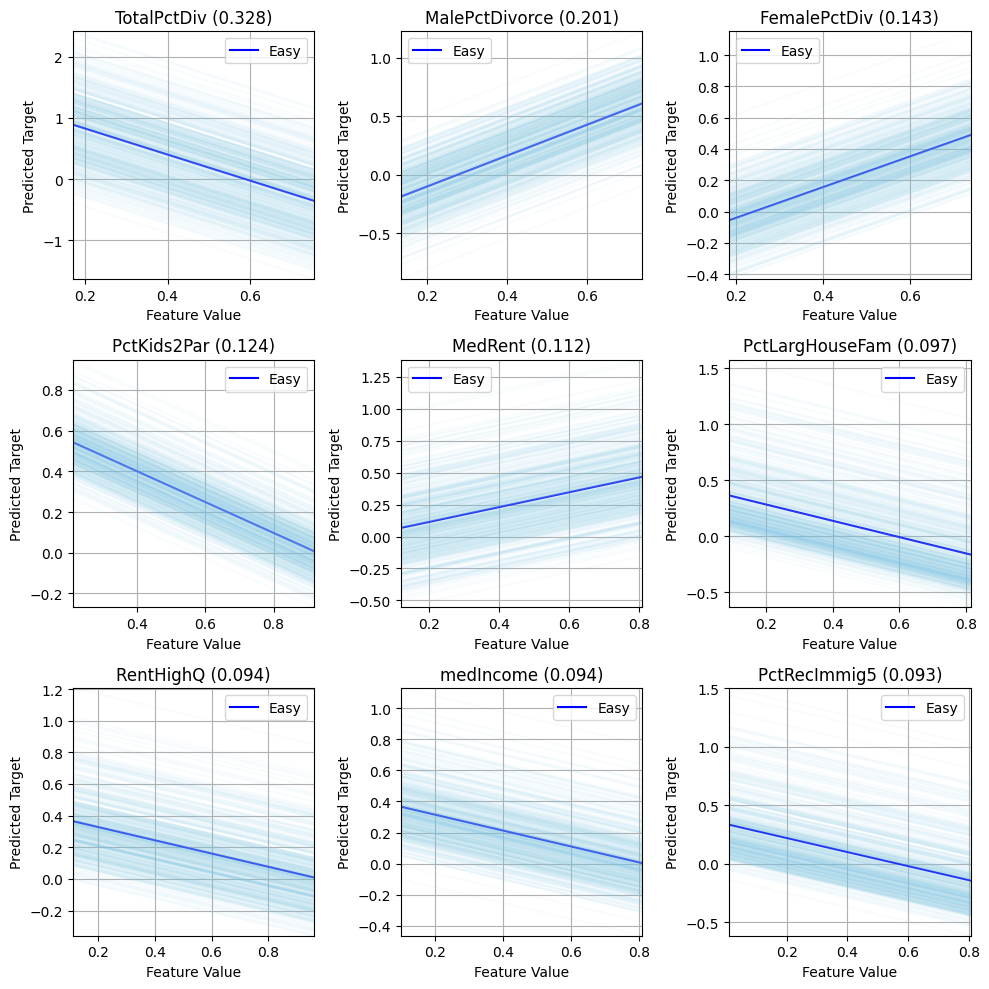

In [6]:
from holisticai.explainability.plots import plot_partial_dependence

plot_partial_dependence(xai_features.partial_dependence, xai_features.ranked_feature_importance, subplots=(3,3), figsize=(10,10))

# 3. Classification

In [7]:
from sklearn.linear_model import LogisticRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import accuracy_score

dataset = load_dataset('adult')
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['test']
test = dataset['test']

model = LogisticRegression()
model.fit(train['X'], train['y'])

accuracy_score(test['y'], model.predict(test['X']))

/home/cristian/.local/share/hatch/env/virtual/holisticai/g8_gwgw3/testing/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7962410171365395

In [8]:
from holisticai.explainability.metrics import classification_explainability_features
from holisticai.explainability.metrics import compute_explainability_metrics_from_features

feature_importance_fn = SHAPImportanceCalculator(train['X'], model)

xai_features = classification_explainability_features(test['X'], test['y'], model.predict, model.predict_proba, classes=model.classes_, strategy=feature_importance_fn)

compute_explainability_metrics_from_features(xai_features, metric_type='both')

PermutationExplainer explainer: 6843it [04:13, 25.47it/s]                          
PermutationExplainer explainer: 2204it [01:23, 23.03it/s]                          
/home/cristian/github/holisticai/src/holisticai/explainability/metrics/local_importance/_stability.py:38: RuntimeWarning: invalid value encountered in divide
  niqr = iqr / medians
/home/cristian/github/holisticai/src/holisticai/explainability/metrics/local_importance/_stability.py:18: RuntimeWarning: invalid value encountered in divide
  niqr_row = iqr_row / medians_row


,value,reference
metric,,
Alpha Importance Score,0.012195,0.0
XAI Ease Score,0.750000,1.0
Position Parity,0.000000,1.0
Rank Alignment,0.000000,1.0
Spread Ratio,0.250898,0.0
Feature Stability,NaN,0.0
Data Stability,NaN,0.0


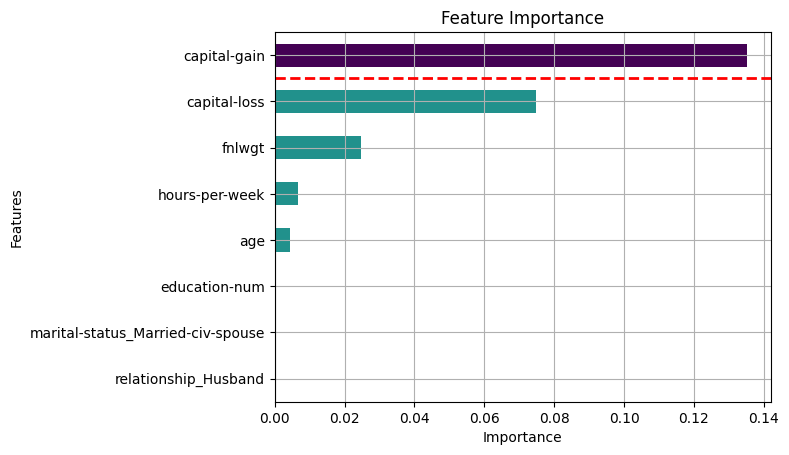

In [9]:
from holisticai.explainability.plots import plot_feature_importance

plot_feature_importance(xai_features.feature_importance, xai_features.ranked_feature_importance, top_n=8)

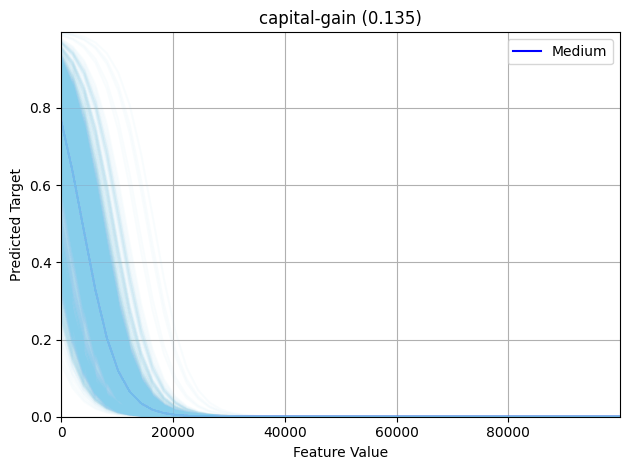

In [10]:
from holisticai.explainability.plots import plot_partial_dependence

class_index = 0 #1
plot_partial_dependence(xai_features.partial_dependence[class_index], xai_features.ranked_feature_importance, subplots=(1,1))

# Multi Classification

In [11]:
from sklearn.linear_model import LogisticRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import accuracy_score

dataset = load_dataset(dataset_name="student_multiclass")
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['test']
test = dataset['test']

model = LogisticRegression()
model.fit(train['X'], train['y'])

accuracy_score(test['y'], model.predict(test['X']))

/home/cristian/.local/share/hatch/env/virtual/holisticai/g8_gwgw3/testing/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.810126582278481

In [12]:
from holisticai.explainability.metrics import multiclass_explainability_features
from holisticai.explainability.metrics import compute_explainability_metrics_from_features

feature_importance_fn = SHAPImportanceCalculator(train['X'], model)

xai_features = multiclass_explainability_features(test['X'], test['y'], model.predict, model.predict_proba, classes=model.classes_, strategy=feature_importance_fn)

compute_explainability_metrics_from_features(xai_features)

,value,reference
metric,,
Alpha Importance Score,0.538462,0.0
XAI Ease Score,0.928571,1.0
Position Parity,0.047050,1.0
Rank Alignment,0.281982,1.0
Spread Ratio,0.921634,0.0


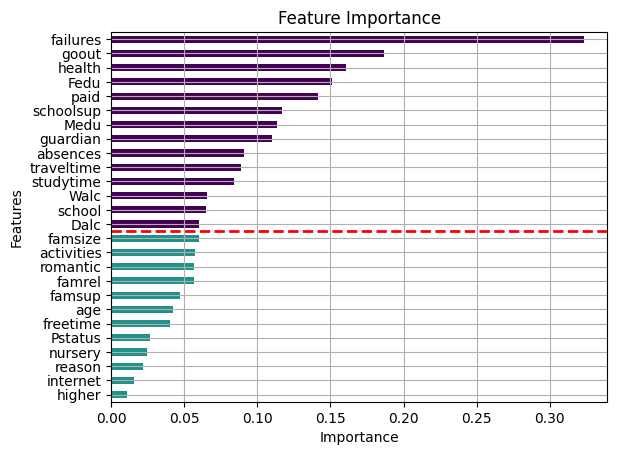

In [13]:
from holisticai.explainability.plots import plot_feature_importance

plot_feature_importance(xai_features.feature_importance, xai_features.ranked_feature_importance, top_n=30)

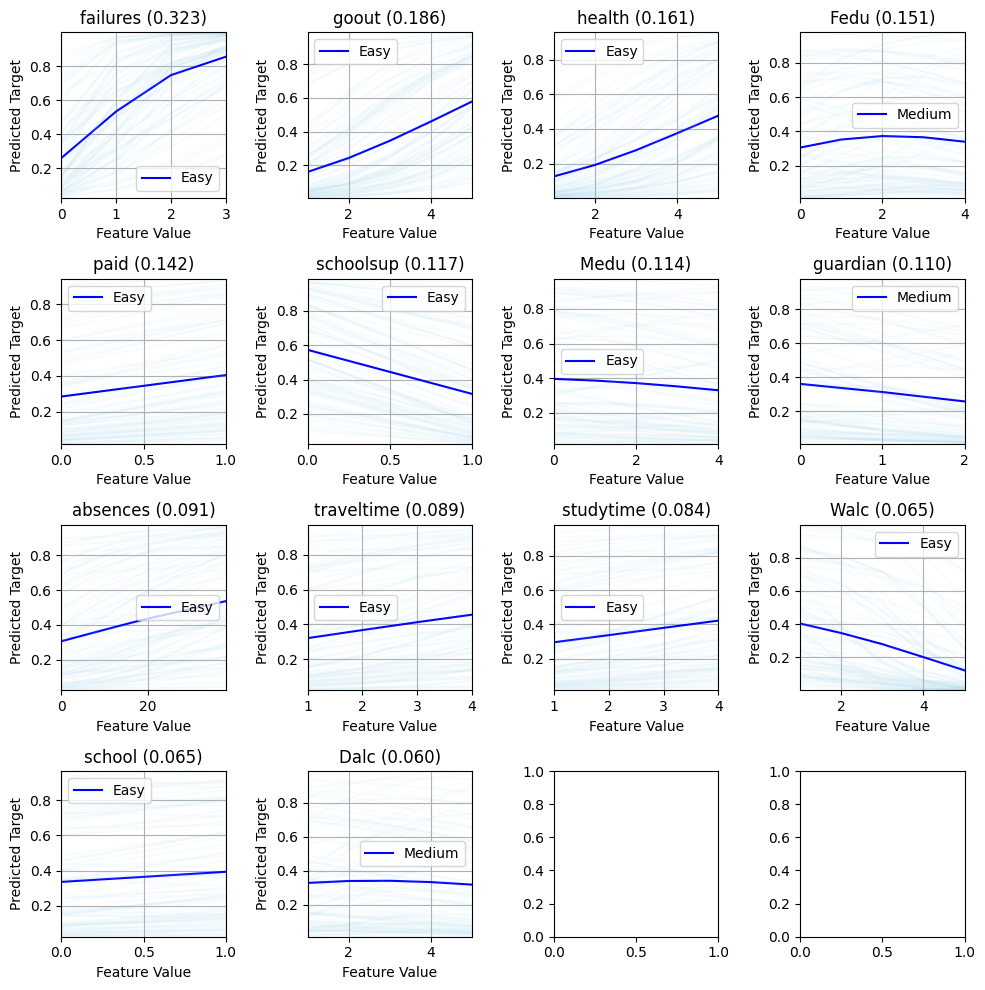

In [14]:
from holisticai.explainability.plots import plot_partial_dependence

class_index = 0 #1
plot_partial_dependence(xai_features.partial_dependence[0], xai_features.ranked_feature_importance, subplots=(4,4), figsize=(10,10))